In [24]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

In [25]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [26]:
data = pd.read_csv('E:\Projects\Bike Sharing Demand Prediction using Regression Tree\hour.csv',sep = ',')

In [27]:
seasonMap = {1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }
weatherMap = {1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
              2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
              3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
              4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }

In [28]:
data["date"] = data.dteday.apply(lambda x : x.split()[0])
data["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data["season"] = data.season.map(seasonMap)
data["weather"] = data.weathersit.map(weatherMap)

In [29]:
categoryVariableList  = ["hr","weekday","mnth","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")
    
data = data.drop(["dteday"],axis=1)

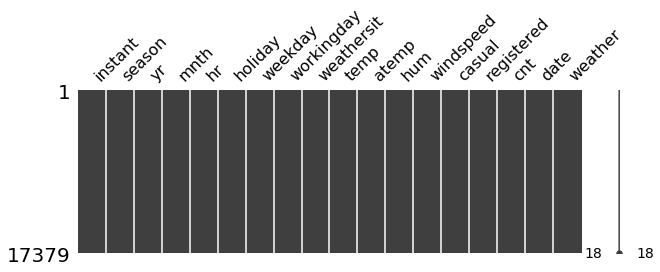

In [30]:
msno.matrix(data,figsize=(10,3))

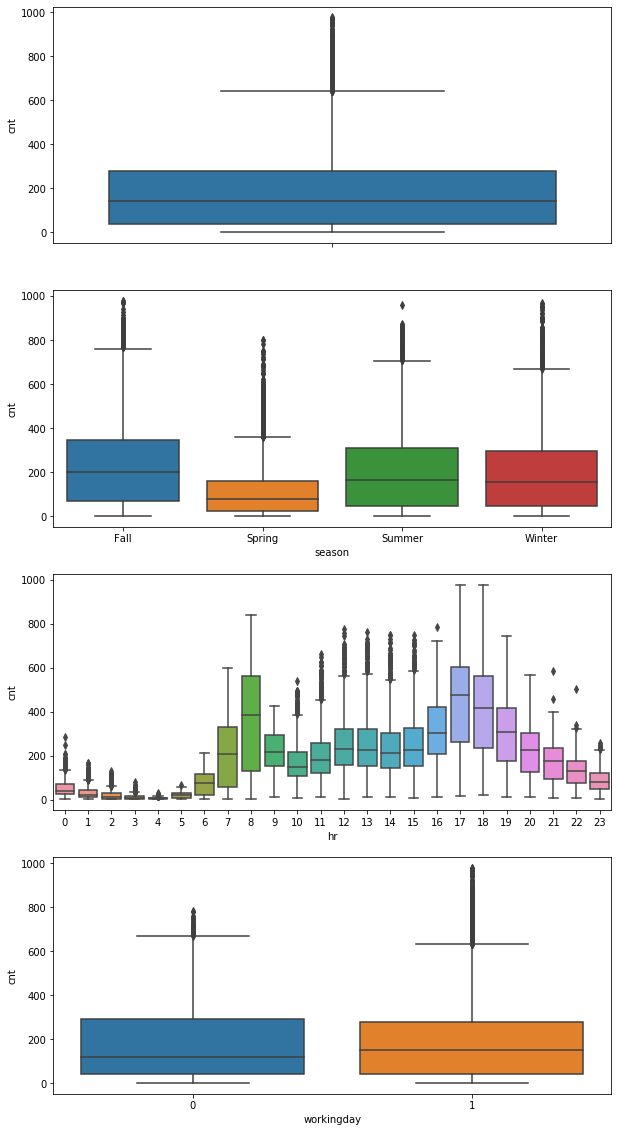

In [31]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,y="cnt",orient="v",ax=axes[0])
sn.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[1])
sn.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2])
sn.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[3])

In [32]:
axes[0].set(ylabel='Count',title="Count Distribution")
axes[1].set(xlabel='Season', ylabel='Count',title="Count/Season Distribution")
axes[2].set(xlabel='Hour Of The Day', ylabel='Count',title="Count/Hour Distribution")
axes[3].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count/Working Day Distribution")

[Text(17.199999999999996, 0.5, 'Count'),
 Text(0.5, 17.200000000000017, 'Working Day'),
 Text(0.5, 1, 'Box Plot On Count/Working Day Distribution')]

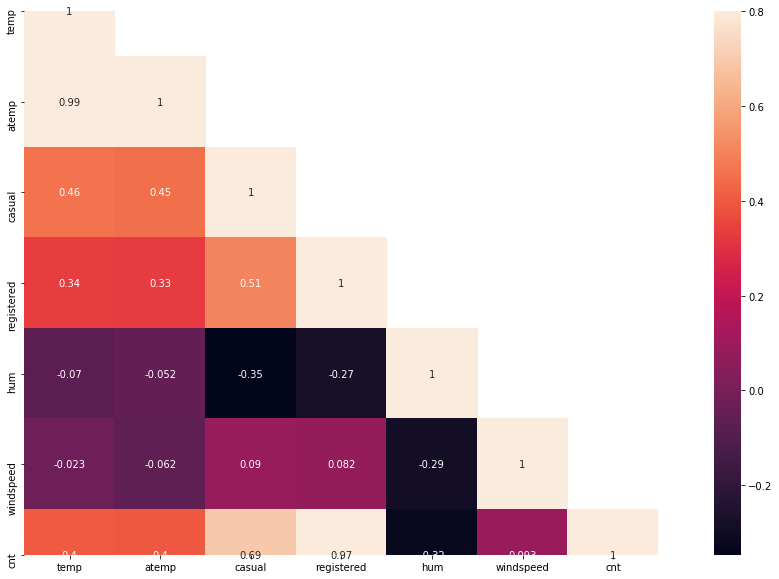

In [16]:
corrMatt = data[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)